In [1]:
import pandas as pd
import os

print(os.listdir("./datasets/titanic/"))
train = pd.read_csv("./datasets/titanic/train.csv")
test = pd.read_csv("./datasets/titanic/test.csv")


['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
test['Survived']="0"
test['train_test']="test"
test = test[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test']]
test[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


In [3]:
train["train_test"]="train"
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [4]:
data = train.append(test)
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null object
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
train_test     1309 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 143.2+ KB


In [6]:
# --- Feature engineering
data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
data[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss


In [7]:
stat_min = 10
title_names = (data['Title'].value_counts() < 10)
data['Title'] = data['Title'].apply(lambda x: 'Misc' if title_names[x] else x)
data['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label = LabelEncoder()
data['Title_Code'] = label.fit_transform(data['Title'])
data['Title_Code'].value_counts()

3    757
2    260
4    197
0     61
1     34
Name: Title_Code, dtype: int64

In [9]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null object
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
train_test     1309 non-null object
Title          1309 non-null object
Title_Code     1309 non-null int32
FamilySize     1309 non-null int64
dtypes: float64(2), int32(1), int64(5), object(8)
memory usage: 168.7+ KB


In [10]:
Cabin = data['Cabin']
Cabin.shape

(1309,)

In [11]:
Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [12]:
cabin = pd.DataFrame(Cabin.str.slice(stop =1))
cabin = cabin.fillna('cabin_NA')
cabin.head()

,Cabin
0,cabin_NA
1,C
2,cabin_NA
3,C
4,cabin_NA


In [13]:
data2 = data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'FamilySize',
        'Fare', 'Embarked', 'Title_Code', 'train_test']]
data2.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize,Fare,Embarked,Title_Code,train_test
0,1,0,3,male,22.0,2,7.2500,S,3,train
1,2,1,1,female,38.0,2,71.2833,C,4,train
2,3,1,3,female,26.0,1,7.9250,S,2,train
3,4,1,1,female,35.0,2,53.1000,S,4,train
4,5,0,3,male,35.0,1,8.0500,S,3,train


In [14]:
data3 = pd.concat([data2, cabin], axis=1, ignore_index=False)
data3.shape

(1309, 11)

In [15]:
data3.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize,Fare,Embarked,Title_Code,train_test,Cabin
0,1,0,3,male,22.0,2,7.2500,S,3,train,cabin_NA
1,2,1,1,female,38.0,2,71.2833,C,4,train,C
2,3,1,3,female,26.0,1,7.9250,S,2,train,cabin_NA
3,4,1,1,female,35.0,2,53.1000,S,4,train,C
4,5,0,3,male,35.0,1,8.0500,S,3,train,cabin_NA


In [16]:
cat_feat = data3[['Cabin', 'Embarked', 'Sex','Pclass','Title_Code']]
num_feat = data3[['Age', 'Fare', 'FamilySize']]
train_test = data3[['PassengerId', 'Survived','train_test']]
print(cat_feat.shape[0])
print(num_feat.shape[0])
print(train_test.shape[0])

1309
1309
1309


In [17]:
cat_feat.head()

,Cabin,Embarked,Sex,Pclass,Title_Code
0,cabin_NA,S,male,3,3
1,C,C,female,1,4
2,cabin_NA,S,female,3,2
3,C,S,female,1,4
4,cabin_NA,S,male,3,3


In [18]:
cat_feat['Pclass'] = cat_feat['Pclass'].astype(object)
cat_feat['Title_Code'] = cat_feat['Title_Code'].astype(object)
cat_feat.head()

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Cabin,Embarked,Sex,Pclass,Title_Code
0,cabin_NA,S,male,3,3
1,C,C,female,1,4
2,cabin_NA,S,female,3,2
3,C,S,female,1,4
4,cabin_NA,S,male,3,3


In [19]:
transformed_data = pd.get_dummies(cat_feat)
transformed_data.columns.values

array(['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_cabin_NA', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Code_0', 'Title_Code_1', 'Title_Code_2',
       'Title_Code_3', 'Title_Code_4'], dtype=object)

In [20]:
transformed_data.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_cabin_NA,Embarked_C,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Code_0,Title_Code_1,Title_Code_2,Title_Code_3,Title_Code_4
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [21]:
from sklearn.preprocessing import StandardScaler

def min_max_scale_data(num_data):
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(num_data), columns=num_data.columns.values, index=num_data.index)
    return data

In [22]:
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 3 columns):
Age           1046 non-null float64
Fare          1308 non-null float64
FamilySize    1309 non-null int64
dtypes: float64(2), int64(1)
memory usage: 40.9 KB


In [23]:
num_feat = num_feat.fillna(num_feat.mean())
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 3 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
FamilySize    1309 non-null int64
dtypes: float64(2), int64(1)
memory usage: 40.9 KB


In [24]:
num_feat2 = min_max_scale_data(num_feat)
num_feat2.head()

,Age,Fare,FamilySize
0,-0.611972,-0.503595,0.073352
1,0.630431,0.734503,0.073352
2,-0.301371,-0.490544,-0.558346
3,0.397481,0.382925,0.073352
4,0.397481,-0.488127,-0.558346


In [25]:
data4 = pd.concat([num_feat2, transformed_data], axis=1, ignore_index=False)
data4.shape

(1309, 25)

In [26]:
data5 = pd.concat([train_test, data4], axis=1, ignore_index=False)
data5[:3]

,PassengerId,Survived,train_test,Age,Fare,FamilySize,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Code_0,Title_Code_1,Title_Code_2,Title_Code_3,Title_Code_4
0,1,0,train,-0.611972,-0.503595,0.073352,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2,1,train,0.630431,0.734503,0.073352,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
2,3,1,train,-0.301371,-0.490544,-0.558346,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [27]:
train = data5.loc[(data5.train_test == 'train')]
train = train.drop("train_test", axis = 1)
print(train.shape)
train[:3]

(891, 27)


,PassengerId,Survived,Age,Fare,FamilySize,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Code_0,Title_Code_1,Title_Code_2,Title_Code_3,Title_Code_4
0,1,0,-0.611972,-0.503595,0.073352,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2,1,0.630431,0.734503,0.073352,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2,3,1,-0.301371,-0.490544,-0.558346,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [28]:
train['Survived'] = train['Survived'].astype(int)


In [29]:
test_KAGGLE = data5.loc[data5.train_test == 'test']
test_KAGGLE = test_KAGGLE.drop("train_test", axis = 1)
print(test_KAGGLE.shape)
test_KAGGLE[:3]

(418, 27)


,PassengerId,Survived,Age,Fare,FamilySize,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Code_0,Title_Code_1,Title_Code_2,Title_Code_3,Title_Code_4
0,892,0,0.358655,-0.492396,-0.558346,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,893,0,1.329283,-0.508429,0.073352,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,894,0,2.494035,-0.456465,-0.558346,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


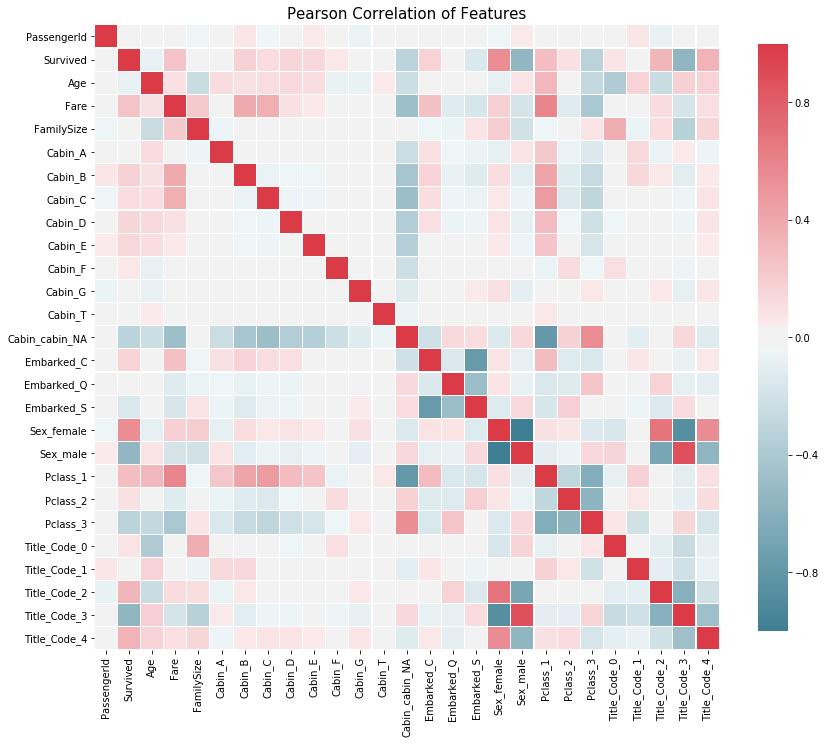

In [33]:
#correlation heatmap of dataset
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=False, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [34]:
train.columns.values

array(['PassengerId', 'Survived', 'Age', 'Fare', 'FamilySize', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Cabin_cabin_NA', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Code_0', 'Title_Code_1', 'Title_Code_2',
       'Title_Code_3', 'Title_Code_4'], dtype=object)

In [37]:
# --- Model
X = train.drop(["PassengerId", "Survived"], axis=1)
y = train["Survived"].copy()

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
cross_val_score(rand_clf, X, y, cv=3, scoring="accuracy")

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.76767677, 0.81818182, 0.79461279])

In [39]:
rand_clf1 = RandomForestClassifier(n_estimators=720, max_leaf_nodes=32, max_features = 16, n_jobs=-1)
cross_val_score(rand_clf1, X, y, cv=3, scoring="accuracy")


array([0.81144781, 0.85521886, 0.83501684])

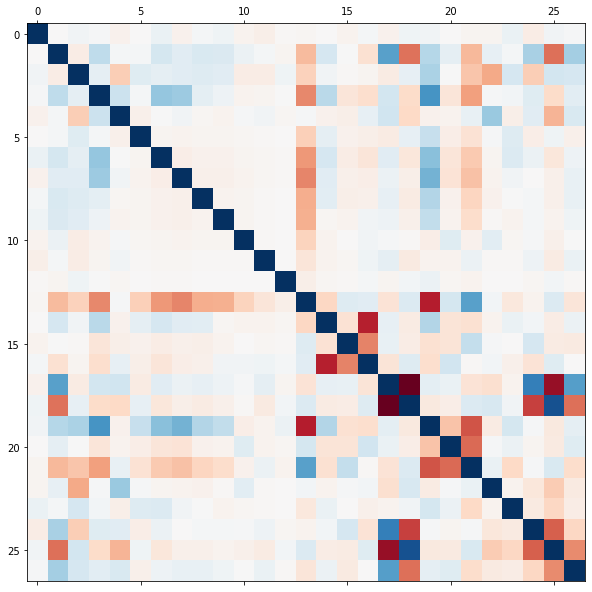

In [61]:
plt.rcParams["figure.figsize"]=[10,10]
plt.matshow(train.corr(), 
            cmap=plt.cm.RdBu
            )


In [62]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [64]:
rnd_clf2 = RandomForestClassifier(n_estimators=720, max_leaf_nodes=32, max_features = 16, n_jobs=-1)
rnd_clf2.fit(X_train, y_train)
y_pred_rf_train = rnd_clf2.predict(X_train)
accuracy_score(y_train, y_pred_rf_train)

0.9069020866773676

In [66]:
y_pred_rf_test = rnd_clf2.predict(X_test)
accuracy_score(y_test, y_pred_rf_test)

0.8432835820895522

In [67]:
from sklearn.metrics import confusion_matrix, f1_score

cnf_matrix = confusion_matrix(y_test, y_pred_rf_test)
cnf_matrix

array([[153,  15],
       [ 27,  73]], dtype=int64)

In [69]:
# --- f1 score

from sklearn.metrics import f1_score

f1_score(y_test, y_pred_rf_test)

0.7765957446808511

In [79]:
feature_importacne = pd.Series(rnd_clf2.feature_importances_, index=X.columns)
feature_importacne.sort_values(ascending=False)

Title_Code_3      0.204586
Age               0.129026
Fare              0.125813
Sex_male          0.119933
Sex_female        0.115464
FamilySize        0.094660
Pclass_3          0.070428
Cabin_E           0.019902
Cabin_cabin_NA    0.018938
Embarked_S        0.015648
Pclass_1          0.014410
Title_Code_0      0.009288
Embarked_Q        0.009247
Title_Code_4      0.008389
Embarked_C        0.008306
Pclass_2          0.007059
Title_Code_1      0.006155
Title_Code_2      0.005459
Cabin_C           0.005138
Cabin_D           0.004520
Cabin_B           0.002981
Cabin_A           0.002046
Cabin_G           0.001723
Cabin_F           0.000805
Cabin_T           0.000075
dtype: float64

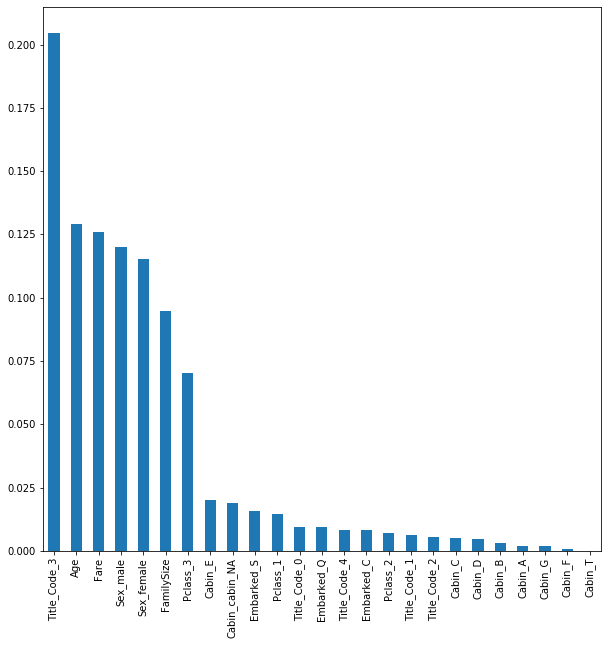

In [82]:
feature_importacne.sort_values(ascending=False).plot(kind="bar")

In [83]:
train

,PassengerId,Survived,Age,Fare,FamilySize,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Code_0,Title_Code_1,Title_Code_2,Title_Code_3,Title_Code_4
0,1,0,-0.611972,-0.503595,0.073352,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2,1,0.630431,0.734503,0.073352,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2,3,1,-0.301371,-0.490544,-0.558346,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,4,1,0.397481,0.382925,0.073352,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,5,0,0.397481,-0.488127,-0.558346,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,6,0,0.000000,-0.480232,-0.558346,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
6,7,0,1.872834,0.358997,-0.558346,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
7,8,0,-2.164975,-0.236286,1.968447,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8,9,1,-0.223721,-0.428510,0.705051,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9,10,1,-1.233173,-0.062350,0.073352,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
